In [8]:
import utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [9]:
pod_config = utils.init()
ranking_method = utils.hareruya_permutations_with_draw_and_byes_and_seat_factor

lock_players = {
    "Lily Temel She/Her": 14,
    }

Active players 106
Pod config (4P/Byes):
(26, 2)
Finished rounds
--- 5


In [10]:
# _, sheets = hareruya_permutations(control_sheet, match_logs)
# round_permutations = list(permutations(np.arange(1, 5+1)))
# player = "C arl Mandl"
# player = "Wolfgang Obermeier"

# player_points = []
# for i, ele in enumerate(sheets):
#     player_points.append((
#         ele.loc[player, "Points"],
#         round_permutations[i]
#     ))
    


# player_points_df = pd.DataFrame(player_points, columns = ["Points", "perm"]).sort_values("Points")
# import matplotlib.pyplot as plt
# plt.hist(player_points_df.Points.values)
# plt.show()
# player_points_df

In [11]:
r1_loss = [
    
]
loss_matches = []
for player in r1_loss:
    match_log_element = {}
    match_log_element["match_players"] = [player]
    match_log_element["match_result"] = "loss"
    match_log_element["round"] = 1
    match_log_element["pod"] = 0
    loss_matches.append(match_log_element)

In [12]:
loss_matches

[]

In [13]:
pd.read_excel("control_sheet.ods", engine="odf", sheet_name="general").groupby("Player").count().sort_values("dropped")

,dropped
Player,
Alexander Berthold,1
Philipp Borst,1
Philipp Befard,1
Philip Jorzik,1
Paul Schandelmaier,1
...,...
Florian Witthaut,1
Florian Schumacher,1
Felix Goldbach,1


In [14]:
control_sheet = utils.get_control_sheet()
if control_sheet.shape[0] != len(control_sheet.index.unique()):
    raise Exception("#\n#\n#\n#\n#\nPOTENTIAL DUPLICATE PLAYER NAME#\n#\n#\n#\n#\n#\n#\n")

In [15]:
# match_logs

In [16]:
oppo_dict = utils.get_oppo_dict(control_sheet)
match_logs = utils.get_match_logs(control_sheet)
match_logs = loss_matches + match_logs
# standings_after_rounds = utils.get_standings_after_rounds(control_sheet, match_logs, oppo_dict, method=ranking_method)
control_sheet = utils.add_wld(control_sheet, match_logs)
control_sheet = utils.add_standing(control_sheet, match_logs, method=ranking_method)
control_sheet = utils.get_weighted_opp_win_percentage(control_sheet, oppo_dict)
control_sheet = utils.get_weighted_opp_win_percentage_with_draws(control_sheet, oppo_dict)
control_sheet = utils.add_avg_seat(control_sheet, match_logs)

100%|██████████| 120/120 [00:05<00:00, 23.96it/s]


In [17]:
# control_sheet[control_sheet.index.str.contains("Prim")]
control_sheet.sort_values("Points", ascending=False).head(20)

,dropped,win,loss,draw,bye,Random,Points,Regular points,points_before_bye,avg_point_move,Rank,n_games,WR,weighted_oppo_WR,weighted_oppo_WR_with_draws,seat_sum,seat_std,seatings,seat_avg
Player,,,,,,,,,,,,,,,,,,,
Konrad Bierlein,0.0,3.0,1.0,1.0,0.0,0.797376,1559.511210,16.0,1559.511210,111.902242,1,5.0,0.6,0.222222,0.255952,14,1.166190,"[2, 4, 1, 3, 4]",2.8
Stefan Chladek,0.0,3.0,1.0,1.0,0.0,0.924528,1535.390837,16.0,1535.390837,107.078167,2,5.0,0.6,0.229730,0.268340,12,1.356466,"[4, 1, 2, 4, 1]",2.4
Jonathan Osagie,0.0,3.0,1.0,1.0,0.0,0.665522,1520.563624,16.0,1520.563624,104.112725,3,5.0,0.6,0.162162,0.194981,13,1.019804,"[1, 4, 2, 3, 3]",2.6
Raphael Köhl,0.0,3.0,1.0,1.0,0.0,0.408000,1519.523062,16.0,1519.523062,103.904612,4,5.0,0.6,0.189189,0.208494,13,1.356466,"[3, 1, 4, 1, 4]",2.6
Even Cell,0.0,3.0,2.0,0.0,0.0,0.051769,1461.768220,15.0,1461.768220,92.353644,5,5.0,0.6,0.219178,0.244618,12,1.019804,"[4, 2, 1, 3, 2]",2.4
Alpaslan Ayar,0.0,3.0,2.0,0.0,0.0,0.970029,1455.211054,15.0,1455.211054,91.042211,6,5.0,0.6,0.191781,0.219178,13,1.200000,"[2, 2, 4, 1, 4]",2.6
Luka Vodnik,0.0,3.0,2.0,0.0,0.0,0.144351,1445.086258,15.0,1445.086258,89.017252,7,5.0,0.6,0.150685,0.172211,13,1.019804,"[2, 3, 3, 1, 4]",2.6
Henry,0.0,3.0,2.0,0.0,0.0,0.600961,1439.824297,15.0,1439.824297,87.964859,8,5.0,0.6,0.136986,0.160470,13,1.019804,"[3, 1, 4, 2, 3]",2.6
Dmitrij Krasnoutskij,0.0,3.0,2.0,0.0,0.0,0.692130,1425.830907,15.0,1425.830907,85.166181,9,5.0,0.6,0.104478,0.136461,13,1.019804,"[3, 2, 3, 1, 4]",2.6


In [18]:
control_sheet.sort_values(["Regular points", "weighted_oppo_WR_with_draws"], ascending=False).head(20)

,dropped,win,loss,draw,bye,Random,Points,Regular points,points_before_bye,avg_point_move,Rank,n_games,WR,weighted_oppo_WR,weighted_oppo_WR_with_draws,seat_sum,seat_std,seatings,seat_avg
Player,,,,,,,,,,,,,,,,,,,
Stefan Chladek,0.0,3.0,1.0,1.0,0.0,0.924528,1535.390837,16.0,1535.390837,107.078167,2,5.0,0.6,0.229730,0.268340,12,1.356466,"[4, 1, 2, 4, 1]",2.4
Konrad Bierlein,0.0,3.0,1.0,1.0,0.0,0.797376,1559.511210,16.0,1559.511210,111.902242,1,5.0,0.6,0.222222,0.255952,14,1.166190,"[2, 4, 1, 3, 4]",2.8
Raphael Köhl,0.0,3.0,1.0,1.0,0.0,0.408000,1519.523062,16.0,1519.523062,103.904612,4,5.0,0.6,0.189189,0.208494,13,1.356466,"[3, 1, 4, 1, 4]",2.6
Jonathan Osagie,0.0,3.0,1.0,1.0,0.0,0.665522,1520.563624,16.0,1520.563624,104.112725,3,5.0,0.6,0.162162,0.194981,13,1.019804,"[1, 4, 2, 3, 3]",2.6
Even Cell,0.0,3.0,2.0,0.0,0.0,0.051769,1461.768220,15.0,1461.768220,92.353644,5,5.0,0.6,0.219178,0.244618,12,1.019804,"[4, 2, 1, 3, 2]",2.4
Alpaslan Ayar,0.0,3.0,2.0,0.0,0.0,0.970029,1455.211054,15.0,1455.211054,91.042211,6,5.0,0.6,0.191781,0.219178,13,1.200000,"[2, 2, 4, 1, 4]",2.6
Luka Vodnik,0.0,3.0,2.0,0.0,0.0,0.144351,1445.086258,15.0,1445.086258,89.017252,7,5.0,0.6,0.150685,0.172211,13,1.019804,"[2, 3, 3, 1, 4]",2.6
Henry,0.0,3.0,2.0,0.0,0.0,0.600961,1439.824297,15.0,1439.824297,87.964859,8,5.0,0.6,0.136986,0.160470,13,1.019804,"[3, 1, 4, 2, 3]",2.6
Dmitrij Krasnoutskij,0.0,3.0,2.0,0.0,0.0,0.692130,1425.830907,15.0,1425.830907,85.166181,9,5.0,0.6,0.104478,0.136461,13,1.019804,"[3, 2, 3, 1, 4]",2.6


(2.502118644067796, 0.16555966567159713)

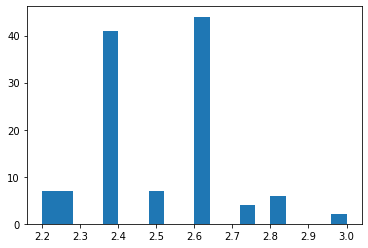

In [19]:
plt.hist(control_sheet.seat_avg, bins=20)
control_sheet.seat_avg.mean(), control_sheet.seat_avg.std()
#(2.4966292134831463, 0.459359593298166) # no rule
# (2.500374531835206, 0.13766582122626078) # reordering
# (2.5003745318352055, 0.11117989585798187) # std reordering

In [24]:
# control_sheet["test_rank"] =(
#         control_sheet[["Points", "Random"]]
#         .apply(tuple,axis=1)
#         .rank(method='dense',ascending=False)
#         .astype(int)
#         )
# control_sheet.sort_values("test_rank").head(50)
# match_logs
control_sheet.tail(20)
control_sheet.seatings[0]


[2, 4, 1, 3, 4]

In [25]:
# match_logs
# control_sheet[control_sheet.dropped != 2].tail(50)
control_sheet[["win", "loss", "draw", "bye"]] = control_sheet[["win", "loss", "draw", "bye"]].astype(int)

In [26]:
control_sheet[control_sheet.dropped != 2].sort_index()[["Points", "Rank",
                                                        # "weighted_oppo_WR", "weighted_oppo_WR_with_draws", "Regular points", "dropped", "Random"
                                                        "win", "loss", "draw", "bye"]].sort_values("Rank", ascending=True).head(20)#.astype(int)

,Points,Rank,win,loss,draw,bye
Player,,,,,,
Konrad Bierlein,1559.511210,1,3,1,1,0
Stefan Chladek,1535.390837,2,3,1,1,0
Jonathan Osagie,1520.563624,3,3,1,1,0
Raphael Köhl,1519.523062,4,3,1,1,0
Even Cell,1461.768220,5,3,2,0,0
Alpaslan Ayar,1455.211054,6,3,2,0,0
Luka Vodnik,1445.086258,7,3,2,0,0
Henry,1439.824297,8,3,2,0,0
Dmitrij Krasnoutskij,1425.830907,9,3,2,0,0


In [27]:
control_sheet[control_sheet.dropped != 2][["Points", "Rank","win", "loss", "draw", "bye"]].to_csv("current_standing.csv")

In [28]:
# generate next round
best_score = np.inf
best_pairings = None
next_round_number = utils.get_finished_round() + 1
print(f"Next round number: {next_round_number}")

Next round number: 6


In [ ]:
for i in tqdm(range(10_000)):
    pods_4P, players_byes = utils.get_heuristic_pairing(control_sheet, pod_config, oppo_dict, lock_players)
    # pods_4P, pods_3P = utils.get_random_pairings(control_sheet, pod_config)
    score, rematch_counter = utils.get_pairing_scores(
        control_sheet,
        oppo_dict,
        pods_4P,
    )
    if score < best_score:
        best_pairings = [pods_4P, players_byes]
        best_score = score
        print(best_score)
    if best_score == 0:
        break

100%|██████████| 10/10 [00:00<00:00, 12.68it/s]

0.9985842163752918
0.9985762730334742


In [31]:
# best_pairings[0], best_pairings[1]
# control_sheet.sample()
# control_sheet["no_loser"] = 0
# control_sheet.loc[(control_sheet.win > 0) | (control_sheet.draw > 0), "no_loser"] = 1
# control_sheet.sort_values("no_loser", ascending=False)

In [33]:
new_best_pairings = []
for match in best_pairings[0]:
    # print(match)
    print(control_sheet[control_sheet.index.isin(match)].sort_values(["seat_avg", "Random"], ascending=False).to_markdown())
    reordered_pod = control_sheet[control_sheet.index.isin(match)].sort_values(["seat_avg", "Random"], ascending=False).index.to_list()
    # print(reordered_pod)
    new_best_pairings.append(reordered_pod)
    # break

best_pairings[0] = new_best_pairings

| Player         |   dropped |   win |   loss |   draw |   bye |   Random |   Points |   Regular points |   points_before_bye |   avg_point_move |   Rank |   n_games |   WR |   weighted_oppo_WR |   weighted_oppo_WR_with_draws |   seat_sum |   seat_std | seatings        |   seat_avg |
|:---------------|----------:|------:|-------:|-------:|------:|---------:|---------:|-----------------:|--------------------:|-----------------:|-------:|----------:|-----:|-------------------:|------------------------------:|-----------:|-----------:|:----------------|-----------:|
| Matthias Kranz |         0 |     2 |      1 |      2 |     0 | 0.717367 | 1307.02  |               12 |            1307.02  |          61.4035 |     15 |         5 |  0.4 |           0.125    |                      0.164683 |         13 |   1.2      | [2, 2, 4, 1, 4] |        2.6 |
| Max Kretschmer |         0 |     0 |      2 |      3 |     0 | 0.490354 |  874.956 |                3 |             874.956 |           0      

In [34]:
paper_pairings = []
running_pod_number = 1

for pod_number, pod in enumerate(best_pairings[0]):

    for seat, player in enumerate(pod):
        paper_pairings.append(
            (
                player,
                running_pod_number,
                seat + 1,

            )
        )
    running_pod_number += 1

for seat, player in enumerate(best_pairings[1]): # these are the bye players
    paper_pairings.append(
        (
            player,
            "BYE",
            0,

        )
    )

paper_pairings

[('Matthias Kranz', 1, 1),
 ('Max Kretschmer', 1, 2),
 ('Daniel Kertesz', 1, 3),
 ('Jonas', 1, 4),
 ('Anej Jesenek', 2, 1),
 ('Jasper Stein', 2, 2),
 ('Arne van Bochove', 2, 3),
 ('Florian Schumacher', 2, 4),
 ('Luka Vodnik', 3, 1),
 ('Tony Dao', 3, 2),
 ('Rene Schärling', 3, 3),
 ('Henning Jansen', 3, 4),
 ('Simon Korhammer', 4, 1),
 ('Juri Kannheiser', 4, 2),
 ('Robin Walz', 4, 3),
 ('Noel', 4, 4),
 ('Kai Metzner', 5, 1),
 ('Alexander Berthold', 5, 2),
 ('Kelvin We', 5, 3),
 ('Markus Stadler', 5, 4),
 ('Konstantin Hummel', 6, 1),
 ('Julian Prokosch', 6, 2),
 ('duk9r', 6, 3),
 ('Even Cell', 6, 4),
 ('Alpaslan Ayar', 7, 1),
 ('Mark Vale', 7, 2),
 ('Nikolai Kornherr', 7, 3),
 ('Benyi Heider', 7, 4),
 ('Alexander Gerhardt', 8, 1),
 ('Toni Gleichmann', 8, 2),
 ('Dennis Jühlen', 8, 3),
 ('Leon Unbehaun', 8, 4),
 ('Thomas Schadinger', 9, 1),
 ('Malte Martens', 9, 2),
 ('Robert Geisler', 9, 3),
 ('Tim Ackermann', 9, 4),
 ('Paul Karabaczek', 10, 1),
 ('Dmitrij Krasnoutskij', 10, 2),
 ('David 

In [35]:
paper_pairings = pd.DataFrame(paper_pairings, columns = ["Player", "Pod", "Seat"])
paper_pairings.to_csv(f"round_{next_round_number}pairings.csv", sep=";", index=False)

In [36]:
# best_pairings_flat = best_pairings[0] + best_pairings[1]
# for ele in [player for pod in best_pairings_flat for player in pod]:
#     print(ele)

In [37]:
len(paper_pairings)

106

In [38]:
top16_players = control_sheet.sort_values("Rank", ascending=True).index[:16]

top16_pairings = pd.DataFrame(index = np.arange(0,16), columns = ["Player", "Pod", "Seat"])

In [39]:
# always generate current top 16 pairings
top16_pairings.loc[0] = (top16_players[0], 1, 1)
top16_pairings.loc[1] = (top16_players[7], 1, 2)
top16_pairings.loc[2] = (top16_players[8], 1, 3)
top16_pairings.loc[3] = (top16_players[15], 1, 4)
top16_pairings.loc[4] = (top16_players[1], 2, 1)
top16_pairings.loc[5] = (top16_players[6], 2, 2)
top16_pairings.loc[6] = (top16_players[9], 2, 3)
top16_pairings.loc[7] = (top16_players[14], 2, 4)
top16_pairings.loc[8] = (top16_players[2], 3, 1)
top16_pairings.loc[9] = (top16_players[5], 3, 2)
top16_pairings.loc[10] = (top16_players[10], 3, 3)
top16_pairings.loc[11] = (top16_players[13], 3, 4)
top16_pairings.loc[12] = (top16_players[3], 4, 1)
top16_pairings.loc[13] = (top16_players[4], 4, 2)
top16_pairings.loc[14] = (top16_players[11], 4, 3)
top16_pairings.loc[15] = (top16_players[12], 4, 4)


In [40]:
top16_pairings
top16_pairings.to_csv(f"top16_pairings.csv", sep=";", index=False)

In [41]:
# analyse seat point relation
round_dfs = []
for i in range(1,next_round_number):
    round_df = pd.read_excel("control_sheet.ods", engine="odf", sheet_name=f"round {i}")
    round_dfs.append(round_df[round_df.Pod != "BYE"])

pd.concat(round_dfs).groupby("Player").agg(["mean", "count"]).sort_values(("Seat", "mean"))

Pod       Seat      
                         mean count mean count
Player                                        
Nico vw             16.800000     5  2.2     5
Florian Witthaut    11.800000     5  2.2     5
David Lisson        23.400000     5  2.2     5
Paul Schandelmaier  13.200000     5  2.2     5
Max Panawong        15.200000     5  2.2     5
...                       ...   ...  ...   ...
Konrad Bierlein     11.200000     5  2.8     5
Konstantin Hummel   11.600000     5  2.8     5
Dario Renner        12.600000     5  2.8     5
Elias Bleicher       5.333333     3  3.0     3
Ömer Akar           13.666667     3  3.0     3

[118 rows x 4 columns]

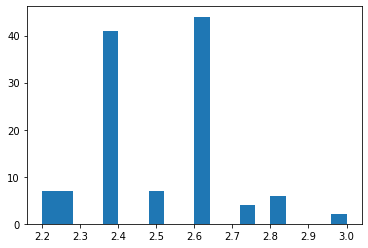

In [42]:
plt.hist(pd.concat(round_dfs).groupby("Player").agg(["mean", "count"])[("Seat", "mean")].values, bins=20)
plt.show()

In [79]:
# joined = control_sheet.join(pd.concat(round_dfs).groupby("Player").agg(["mean", "count"])[[("Seat", "mean")]].T.reset_index(drop=True).T)
# joined["avg_seat"] = joined[0]
# sns.regplot(data=joined, x="avg_seat", y="Points")

<AxesSubplot:xlabel='seat_avg', ylabel='Points'>

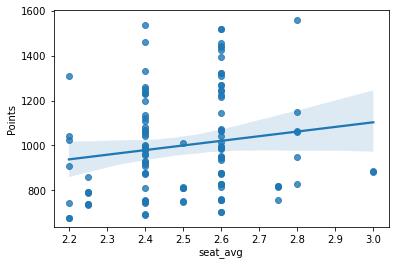

In [82]:
sns.regplot(data=control_sheet, x="seat_avg", y="Points")
# sns.regplot(data=control_sheet[~(control_sheet.index.isin(["Maximilian Eikmeier", "Konrad Bierlein"]))], x="seat_avg", y="Points")

<AxesSubplot:xlabel='seat_avg', ylabel='Points'>

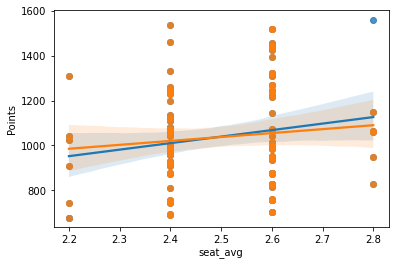

In [80]:
sns.regplot(data=control_sheet[(control_sheet.n_games == 5)], x="seat_avg", y="Points")
sns.regplot(data=control_sheet[(control_sheet.n_games == 5) & ~(control_sheet.index.isin(["Maximilian Eikmeier", "Konrad Bierlein"]))], x="seat_avg", y="Points")

In [46]:
control_sheet.sort_values("seat_avg").tail(20)
control_sheet.head(20)#.sort_values(["Regular points", "weighted_oppo_WR_with_draws"], ascending=[False, False]).head(30)

,dropped,win,loss,draw,bye,Random,Points,Regular points,points_before_bye,avg_point_move,Rank,n_games,WR,weighted_oppo_WR,weighted_oppo_WR_with_draws,seat_sum,seat_std,seatings,seat_avg
Player,,,,,,,,,,,,,,,,,,,
Konrad Bierlein,0.0,3,1,1,0,0.797376,1559.511210,16.0,1559.511210,111.902242,1,5.0,0.6,0.222222,0.255952,14,1.166190,"[2, 4, 1, 3, 4]",2.8
Stefan Chladek,0.0,3,1,1,0,0.924528,1535.390837,16.0,1535.390837,107.078167,2,5.0,0.6,0.229730,0.268340,12,1.356466,"[4, 1, 2, 4, 1]",2.4
Jonathan Osagie,0.0,3,1,1,0,0.665522,1520.563624,16.0,1520.563624,104.112725,3,5.0,0.6,0.162162,0.194981,13,1.019804,"[1, 4, 2, 3, 3]",2.6
Raphael Köhl,0.0,3,1,1,0,0.408000,1519.523062,16.0,1519.523062,103.904612,4,5.0,0.6,0.189189,0.208494,13,1.356466,"[3, 1, 4, 1, 4]",2.6
Even Cell,0.0,3,2,0,0,0.051769,1461.768220,15.0,1461.768220,92.353644,5,5.0,0.6,0.219178,0.244618,12,1.019804,"[4, 2, 1, 3, 2]",2.4
Alpaslan Ayar,0.0,3,2,0,0,0.970029,1455.211054,15.0,1455.211054,91.042211,6,5.0,0.6,0.191781,0.219178,13,1.200000,"[2, 2, 4, 1, 4]",2.6
Luka Vodnik,0.0,3,2,0,0,0.144351,1445.086258,15.0,1445.086258,89.017252,7,5.0,0.6,0.150685,0.172211,13,1.019804,"[2, 3, 3, 1, 4]",2.6
Henry,0.0,3,2,0,0,0.600961,1439.824297,15.0,1439.824297,87.964859,8,5.0,0.6,0.136986,0.160470,13,1.019804,"[3, 1, 4, 2, 3]",2.6
Dmitrij Krasnoutskij,0.0,3,2,0,0,0.692130,1425.830907,15.0,1425.830907,85.166181,9,5.0,0.6,0.104478,0.136461,13,1.019804,"[3, 2, 3, 1, 4]",2.6


In [47]:
control_sheet.sort_values("seat_avg")

,dropped,win,loss,draw,bye,Random,Points,Regular points,points_before_bye,avg_point_move,Rank,n_games,WR,weighted_oppo_WR,weighted_oppo_WR_with_draws,seat_sum,seat_std,seatings,seat_avg
Player,,,,,,,,,,,,,,,,,,,
David Lisson,0.0,0,5,0,0,0.090120,678.562925,0.0,678.562925,0.000000,118,5.0,0.0,0.197183,0.229376,11,1.166190,"[4, 1, 2, 3, 1]",2.2
Maximilian Eikmeier,0.0,0,5,0,0,0.991569,678.562925,0.0,678.562925,0.000000,117,5.0,0.0,0.175676,0.212355,11,1.166190,"[3, 2, 1, 4, 1]",2.2
Nico vw,0.0,2,1,2,0,0.579634,1308.214817,12.0,1308.214817,61.642963,14,5.0,0.4,0.164384,0.213307,11,1.166190,"[2, 4, 1, 3, 1]",2.2
Florian Witthaut,0.0,1,2,2,0,0.146459,1024.146716,7.0,1024.146716,4.829343,47,5.0,0.2,0.205479,0.240705,11,1.166190,"[3, 1, 4, 2, 1]",2.2
Max Panawong,0.0,0,4,1,0,0.553127,741.843237,1.0,741.843237,0.000000,109,5.0,0.0,0.216216,0.256757,11,1.166190,"[1, 4, 2, 3, 1]",2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Konstantin Hummel,0.0,1,4,0,0,0.031033,947.712033,5.0,947.712033,0.000000,63,5.0,0.2,0.246575,0.273973,14,1.166190,"[1, 4, 2, 3, 4]",2.8
Simon Herzog,0.0,0,3,2,0,0.499661,828.164380,2.0,828.164380,0.000000,83,5.0,0.0,0.226667,0.280000,14,1.469694,"[1, 4, 1, 4, 4]",2.8
Dario Renner,0.0,1,2,2,0,0.152087,1065.047044,7.0,1065.047044,13.009409,39,5.0,0.2,0.205479,0.240705,14,1.166190,"[2, 3, 4, 1, 4]",2.8


In [140]:
control_sheet.sort_values("Points", ascending=False).head(20)
control_sheet[control_sheet.index.isin(["Moritz Riegler"])]
control_sheet[control_sheet.index.str.contains("Alex")]
control_sheet[control_sheet.bye == 1]
control_sheet[control_sheet.seat_avg == 2.8]

control_sheet[control_sheet.n_games == 5].groupby("seat_avg").count()
# plt.hist(control_sheet[control_sheet.n_games == 5].seat_avg)

,dropped,topdeck_ID,win,loss,draw,bye,Random,Points,Regular points,points_before_bye,avg_point_move,Rank,n_games,WR,weighted_oppo_WR,weighted_oppo_WR_with_draws,seat_sum,seat_std,seatings,seatings_sorted_str
seat_avg,,,,,,,,,,,,,,,,,,,,
2.2,7,0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2.4,41,1,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41
2.6,44,2,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
2.8,6,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


<AxesSubplot:xlabel='seat_avg', ylabel='seat_std'>

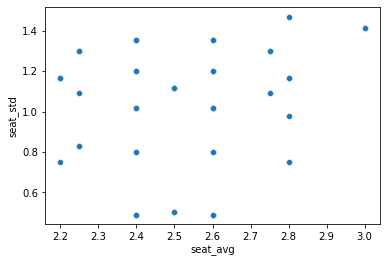

In [45]:
sns.scatterplot(data=control_sheet, x="seat_avg", y="seat_std")
# control_sheet

In [59]:
# groupby by unique types of seatings

# add sorted string version of seatings column

control_sheet["seatings_sorted_str"] = control_sheet["seatings"].copy()
control_sheet["seatings_sorted_str"] = control_sheet["seatings_sorted_str"].sort_values().apply(lambda x: sorted(x)).astype(str)
control_sheet
control_sheet.groupby(["seatings_sorted_str", "seat_avg"]).count().rename({"dropped": "count"}, axis = 1)[["count"]]

,,count
seatings_sorted_str,seat_avg,
"[1, 1, 2, 3, 4]",2.20,6
"[1, 1, 2, 4, 4]",2.40,13
"[1, 1, 3, 3, 4]",2.40,4
"[1, 1, 3, 4, 4]",2.60,15
"[1, 1, 3, 4]",2.25,4
"[1, 1, 4, 4, 4]",2.80,1
"[1, 2, 2, 3, 3]",2.20,1
"[1, 2, 2, 3, 4]",2.40,17
"[1, 2, 2, 4, 4]",2.60,8


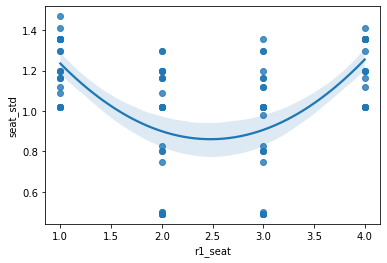

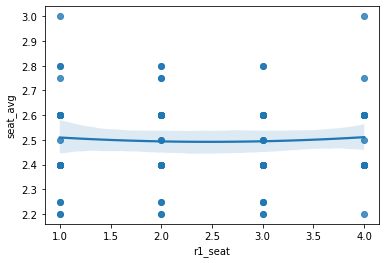

In [77]:
# check 1/4 and 2/3 pattern soft lock

control_sheet["r1_seat"] = 0

control_sheet.loc[:, 'r1_seat'] = control_sheet.seatings.map(lambda x: x[0])

sns.regplot(data=control_sheet[control_sheet.n_games <= 5], x="r1_seat", y="seat_std", order=2)
plt.show()
sns.regplot(data=control_sheet[control_sheet.n_games <= 5], x="r1_seat", y="seat_avg", order=2)
plt.show()

In [48]:
wins_by_seat = {
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0, 
}
draw_count = 0
for i in range(1,next_round_number):
    round_df = pd.read_excel("control_sheet.ods", engine="odf", sheet_name=f"round {i}")
    
    for index, row in round_df.iterrows():
        if row["Result"] == "win":
            wins_by_seat[row["Seat"]] += 1
        elif row["Result"] == "draw":
            draw_count += 0.25

In [49]:
total_games = draw_count + np.sum(list(wins_by_seat.values()))
print("Total games:", int(total_games))
print("Draws:", int(draw_count), "-> draw rate:", np.round(draw_count/total_games, 4)*100, "%")
print("Non-draws:", int(total_games-draw_count))

for key, value in wins_by_seat.items():
    print(f"Seat {key} wins: {value} -> {np.round(value*100/(total_games-draw_count), 2)} %")

Total games: 142
Draws: 35 -> draw rate: 24.65 %
Non-draws: 107
Seat 1 wins: 39 -> 36.45 %
Seat 2 wins: 26 -> 24.3 %
Seat 3 wins: 21 -> 19.63 %
Seat 4 wins: 21 -> 19.63 %


In [78]:
# 33.02/26.32/22.62/18.03